In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.multicomp import pairwise_tukeyhsd
pd.set_option('display.max_columns', 20)

In [2]:
df = pd.read_csv('../datasets/202104-capitalbikeshare-tripdata.csv')
df.head(5)

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,F5C4A81C8792FB5D,electric_bike,2021-04-21 10:38:45,2021-04-21 10:46:59,NaN,NaN,NaN,NaN,38.9,-76.94,38.90,-76.94,casual
1,4A639A0EE09351C7,electric_bike,2021-04-20 20:28:03,2021-04-20 20:28:27,NaN,NaN,NaN,NaN,38.9,-77.00,38.90,-77.00,casual
2,3405FD412F059E35,electric_bike,2021-04-20 23:22:32,2021-04-20 23:23:51,NaN,NaN,NaN,NaN,38.9,-76.94,38.90,-76.94,casual
3,E2B1F0E18AF7811E,electric_bike,2021-04-21 13:00:34,2021-04-21 13:02:27,NaN,NaN,NaN,NaN,38.9,-76.94,38.90,-76.94,casual
4,59FDBFBE03DA25E7,electric_bike,2021-04-20 10:03:55,2021-04-20 10:11:08,NaN,NaN,NaN,NaN,38.9,-76.94,38.89,-76.94,casual


In [3]:
#Converting time labels from string type to numpy datetime64 format
df.started_at=df.started_at.apply(lambda x: np.datetime64(x))
df.ended_at=df.ended_at.apply(lambda x: np.datetime64(x))

In [4]:
#selecting April's last week, 25.04.2021 to 31.04.2021
df_lw = df[df.started_at >=np.datetime64('2021-04-25 23:59:59')]
print(df_lw.shape)
df_lw.head()


(34357, 13)


,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
13,C67AD5BC5578F6CE,electric_bike,2021-04-27 12:09:27,2021-04-27 12:28:08,NaN,NaN,NaN,NaN,38.87,-76.98,38.89,-77.00,member
14,8F3C6508A642FA26,electric_bike,2021-04-29 22:59:17,2021-04-29 23:02:00,NaN,NaN,NaN,NaN,38.92,-77.03,38.93,-77.03,member
15,764D26E98FC913EF,electric_bike,2021-04-29 23:09:50,2021-04-29 23:12:39,NaN,NaN,NaN,NaN,38.93,-77.03,38.93,-77.03,member
22,22505D1FDC6C3065,electric_bike,2021-04-28 20:18:05,2021-04-28 20:21:55,NaN,NaN,NaN,NaN,38.90,-77.02,38.90,-77.02,member
34,9DE3602EC82D2582,electric_bike,2021-04-26 16:38:11,2021-04-26 17:24:29,NaN,NaN,NaN,NaN,38.90,-77.00,38.90,-77.05,member


In [7]:
from datetime import datetime
def np_to_dt(date):
    #converting numpy datetime64 input to python datetime objects
    list_date = np.datetime64(date).astype('str').split('T')[0].split('-')
    return datetime(int(list_date[0]),int(list_date[1]),int(list_date[2]))

# In this cell I create a dataframe that summarises hourly bike use, with similar columns as in hour.csv 
rows = []
days = list([f'0{h}' if h < 10 else str(h) for h in range(26,31,1)])
hours = list([f'0{h}' if h < 10 else str(h) for h in range(0,24,1)])
holiday = np.datetime64('2021-04-16')
columns = ['dteday','season','weekday','hr','holiday','workingday','casual','registered','cnt']
date = '2021-04'
for day in days:
    for hour in hours:
        h_low = f'2021-04-{day} {hour}:00:00'
        h_high = f'2021-04-{day} {hour}:59:59'
        local_df = df[(df.started_at >= np.datetime64(h_low))&(df.started_at <=np.datetime64(h_high))]
        
        casual_count = sum(local_df.member_casual=='casual')
        registered_count=sum(local_df.member_casual=='member')
        total = casual_count+registered_count
        rows.append([np.datetime64(h_low),
        1,
        np_to_dt(f'{date}-{day}').weekday(),
        hour,
        0,
        1,
        casual_count,
        registered_count,
        total])

cnt_df_hour = pd.DataFrame(rows, columns = columns)
cnt_df_hour.workingday = cnt_df_hour.weekday.apply(lambda day : 1 if day < 5  else 0)

In [8]:
cnt_df_hour

,dteday,season,weekday,hr,holiday,workingday,casual,registered,cnt
0,2021-04-26 00:00:00,1,0,00,0,1,31,22,53
1,2021-04-26 01:00:00,1,0,01,0,1,12,14,26
2,2021-04-26 02:00:00,1,0,02,0,1,11,3,14
3,2021-04-26 03:00:00,1,0,03,0,1,4,3,7
4,2021-04-26 04:00:00,1,0,04,0,1,8,5,13
...,...,...,...,...,...,...,...,...,...
115,2021-04-30 19:00:00,1,4,19,0,1,132,200,332
116,2021-04-30 20:00:00,1,4,20,0,1,105,125,230
117,2021-04-30 21:00:00,1,4,21,0,1,71,88,159
118,2021-04-30 22:00:00,1,4,22,0,1,64,91,155


In [9]:
#This cell creates a dataframe with similar columns as in day.csv from the april dataset.
df_copy=cnt_df_hour.copy()
df_copy.dteday=df_copy.dteday.apply(lambda x: np.datetime64(x).astype('str').split('T')[0])
df_copy.drop('hr',axis=1,inplace=True)
dfg=df_copy.groupby('dteday')
# s = dfg.cnt.sum()
# pd.Series(s)
# dfg.registered=dfg.registered.sum()
# dfg.casual=dfg.casual.sum()
# dfg.cnt=dfg.cnt.sum()
cnt_df_day = pd.DataFrame({
    'dteday':dfg.dteday.unique(),
    'season':dfg.season.unique(),
    'weekday':dfg.weekday.unique(),
    'holiday':dfg.holiday.unique(),
    'workingday':dfg.workingday.unique(),
    'casual':dfg.casual.sum(),
    'registered':dfg.registered.sum(),
    'cnt':dfg.cnt.sum()
})
cnt_df_day.reset_index(drop=True, inplace = True)
cnt_df_day
cols = ['dteday','season','weekday','holiday','workingday']

for col in cols:
    cnt_df_day[col]=cnt_df_day[col].apply( lambda x: x[0])

In [10]:
cnt_df_day

,dteday,season,weekday,holiday,workingday,casual,registered,cnt
0,2021-04-26,1,0,0,1,2283,3945,6228
1,2021-04-27,1,1,0,1,3065,4798,7863
2,2021-04-28,1,2,0,1,2712,4554,7266
3,2021-04-29,1,3,0,1,2346,4302,6648
4,2021-04-30,1,4,0,1,2475,3877,6352


* lng: 38.710000 - 39.125828
* lat: (-77.368416)- (-76.825535)

min: 38.71,-77.368416
max: 39.125828, -76.825535

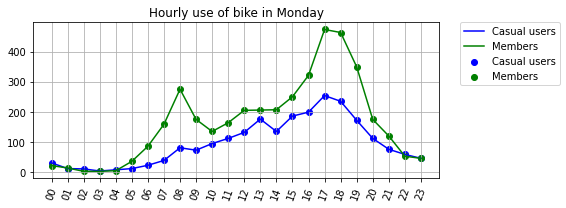

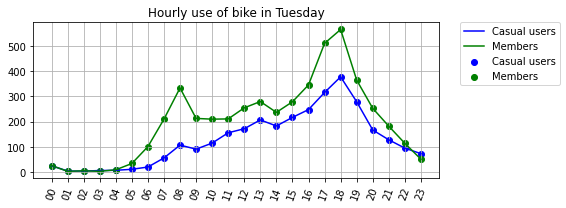

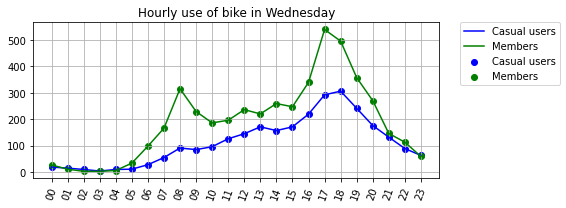

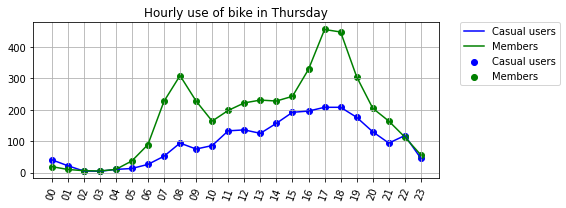

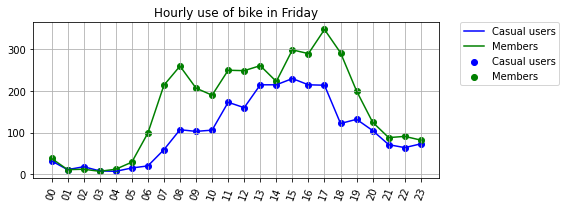

In [12]:
#Plotting the change of bike use over time for registered users and casual users

days = cnt_df_hour['weekday'].unique()
dict_day = {'0':('Monday',(0,0)),
            '1':('Tuesday',(1,0)),
            '2':('Wednesday',(0,1)),
            '3':('Thursday',(1,1)),
            '4':('Friday',(0,2))}
for ind, day in enumerate(days):
    fig, axes = plt.subplots(figsize=(8,3))
    x = cnt_df_hour[cnt_df_hour.weekday == day]['hr'].to_numpy()
    y_casual = cnt_df_hour[cnt_df_hour.weekday == day]['casual'].to_numpy()
    y_registered = cnt_df_hour[cnt_df_hour.weekday == day]['registered'].to_numpy()
    axes.scatter(x,y_casual,c='b', label = 'Casual users')
    axes.scatter(x,y_registered,c='g', label='Members')
    axes.plot(x,y_casual,c='b', label = 'Casual users')
    axes.plot(x,y_registered,c='g', label='Members')
    axes.set_title(f'Hourly use of bike in {dict_day[str(day)][0]}')
    plt.setp(axes.get_xticklabels(),rotation=70)
    axes.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
    axes.grid(b=True, which='both', axis = 'both')
    plt.tight_layout(w_pad=0.1)
    plt.savefig(f'plots/lastweek_{day} .png')

In [13]:
df_day = pd.read_csv('../datasets/day.csv')
df_day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [14]:
def temp_labeler(temp):
    if temp < 0:
        return 'Freezing'
    elif temp < 10: 
        return 'Under 10'
    elif temp < 20:
        return 'Under 20'
    elif temp < 30:
        return 'Under 30'
    else:
        return 'Over 30'

In [15]:
df_hour = pd.read_csv('../datasets/hour.csv')
df_hour.head(50)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
5,6,2011-01-01,1,0,1,5,0,6,0,2,0.24,0.2576,0.75,0.0896,0,1,1
6,7,2011-01-01,1,0,1,6,0,6,0,1,0.22,0.2727,0.80,0.0000,2,0,2
7,8,2011-01-01,1,0,1,7,0,6,0,1,0.20,0.2576,0.86,0.0000,1,2,3
8,9,2011-01-01,1,0,1,8,0,6,0,1,0.24,0.2879,0.75,0.0000,1,7,8
9,10,2011-01-01,1,0,1,9,0,6,0,1,0.32,0.3485,0.76,0.0000,8,6,14


In [16]:
# This part of the cell converts the temperatures from standarized to discrete celsius temperatures

df_hour = pd.read_csv('../datasets/hour.csv')
temp_min = -8
temp_max = 39
atemp_min = -16
atemp_max = 50
df_hour.temp = df_hour.temp.apply(lambda t: t*(temp_max-temp_min)+temp_min)
df_hour.atemp = df_hour.atemp.apply(lambda t: t*(atemp_max-atemp_min)+atemp_min)
dfg=df_hour.groupby('dteday')
df_cmn_tmp= pd.DataFrame({
    'dteday':dfg.dteday.unique(),
    'season':dfg.season.unique(),
    'yr':dfg.yr.unique(),
    'mnth':dfg.mnth.unique(),
    'holiday':dfg.holiday.unique(),
    'weekday':dfg.weekday.unique(),
    'workingday':dfg.workingday.unique(),
    'weathersit':dfg.weathersit.unique(),
    'temp':dfg.temp.mean(),
    'atemp':dfg.atemp.mean(),
    'hum':dfg.hum.mean(),
    'windspeed':dfg.temp.mean(),
    'casual':dfg.casual.sum(),
    'registered':dfg.registered.sum(),
    'cnt':dfg.cnt.sum()
})
df_cmn_tmp.reset_index(drop=True, inplace = True)
df_cmn_tmp
cols = ['dteday','season','yr','mnth','holiday','weekday','workingday']

for col in cols:
    df_cmn_tmp[col]=df_cmn_tmp[col].apply( lambda x: x[0])

df_cmn_tmp['atemp_label']=df_cmn_tmp.atemp.apply(temp_labeler)

df_cmn_tmp['season']=df_cmn_tmp['season'].apply(lambda x: 'Spring'if x ==1  else'Summer'if x==2 else  'Fall' if x==3 else 'Winter')

df_cmn_tmp['season']=df_cmn_tmp['season'].apply(lambda x: 'Spring'if x ==1  else'Summer'if x==2 else  'Fall' if x==3 else 'Winter')

df_frez=df_cmn_tmp[df_cmn_tmp.atemp_label == 'Freezing']
df_10=df_cmn_tmp[df_cmn_tmp.atemp_label == 'Under 10']
df_20=df_cmn_tmp[df_cmn_tmp.atemp_label == 'Under 20']
df_30=df_cmn_tmp[df_cmn_tmp.atemp_label == 'Under 30']
df_u30=df_cmn_tmp[df_cmn_tmp.atemp_label == 'Over 30']
df_cmn_tmp=pd.concat([df_frez,
df_10,
df_20,
df_30,
df_u30,])
df_cmn_tmp.reset_index(inplace=True,drop=True)

df_cmn_tmp.rename(columns={'cnt':'total'},inplace=True)
df_cmn_tmp.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,total,atemp_label
0,2011-01-03,Winter,0,1,0,1,1,[1],1.229091,-3.499300,0.437273,1.229091,120,1229,1349,Freezing
1,2011-01-04,Winter,0,1,0,2,1,"[1, 2]",1.400000,-1.999965,0.590435,1.400000,108,1454,1562,Freezing
2,2011-01-05,Winter,0,1,0,3,1,[1],2.666957,-0.868209,0.436957,2.666957,82,1518,1600,Freezing
3,2011-01-06,Winter,0,1,0,4,1,"[1, 2]",1.604348,-0.608226,0.518261,1.604348,88,1518,1606,Freezing
4,2011-01-07,Winter,0,1,0,5,1,"[2, 3, 1]",1.236522,-2.216617,0.498696,1.236522,148,1362,1510,Freezing


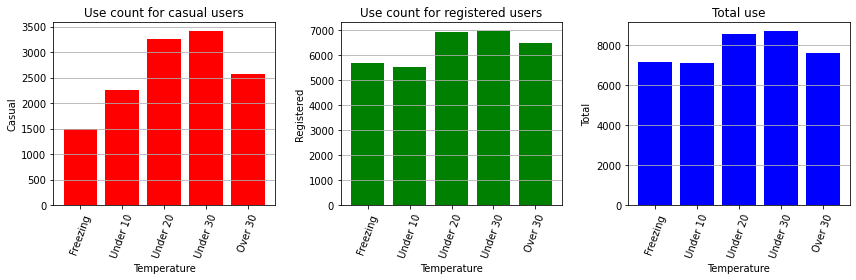

In [17]:
#Plotting the use count for users in different temperature labels
columns = ['casual','registered','total']
colors =['r','g','b']
x=df_cmn_tmp.atemp_label.to_numpy()
fig,axes = plt.subplots(ncols=3, figsize=(12,4))
for ind,col in enumerate(columns):
    y=df_cmn_tmp[col].to_numpy()
    axes[ind].bar(x=x,height=y,color=colors[ind], label='label')
    axes[ind].tick_params(axis='x',labelrotation=70)
    axes[ind].set_title(f'Use count for {col} users' if col != 'total' else 'Total use')
    axes[ind].set_xlabel('Temperature')
    axes[ind].set_ylabel(col.capitalize())
    axes[ind].grid(b=True, which='both', axis = 'y')
fig.tight_layout(w_pad=2)
plt.savefig('plots/use-temp.png')

In [27]:
df_day_cpmnth.sort_values('dteday').mnth.unique()
# df_day_cpmnth

array(['Jan', 'Feb', 'March', 'April', 'May', 'June', 'July', 'Aug',
       'Sept', 'Oct', 'Nov', 'Dec'], dtype=object)

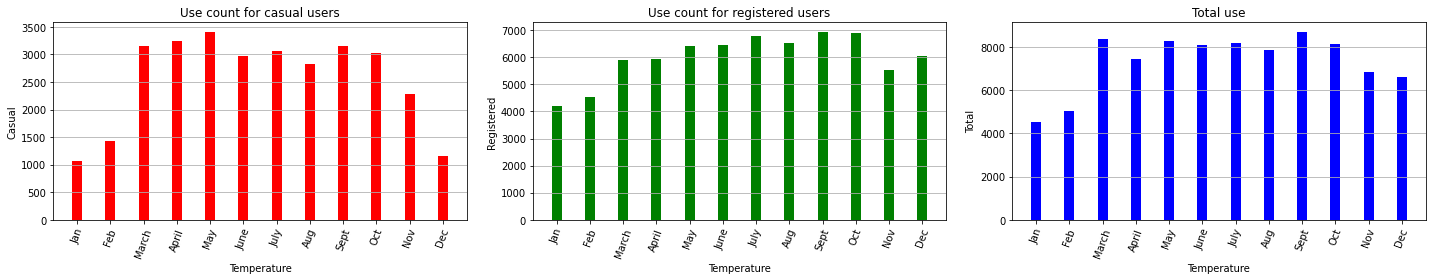

In [28]:
#Plotting bike use by month
df_day_cpmnth = df_cmn_tmp.copy().sort_values('dteday')
df_day_cpmnth['mnth']=df_day_cpmnth['mnth'].apply(lambda x : 'Jan'if x == 1 else
                                                    'Feb'if x == 2 else
                                                    'March'if x == 3 else
                                                    'April'if x == 4 else
                                                    'May'if x == 5 else
                                                    'June'if x == 6 else
                                                    'July'if x == 7 else
                                                    'Aug'if x == 8 else
                                                    'Sept'if x == 9 else
                                                    'Oct'if x == 10 else
                                                    'Nov'if x == 11 else
                                                    'Dec')
columns = ['casual','registered','total']
colors =['r','g','b']
x=df_day_cpmnth.mnth.to_numpy()
fig,axes = plt.subplots(ncols=3, figsize=(20,4))
for ind,col in enumerate(columns):
    y=df_day_cpmnth[col].to_numpy()
    axes[ind].bar(x=x,height=y,color=colors[ind], width=0.3, label='label')
    axes[ind].tick_params(axis='x',labelrotation=70)
    axes[ind].set_title(f'Use count for {col} users' if col != 'total' else 'Total use')
    axes[ind].set_xlabel('Temperature')
    axes[ind].set_ylabel(col.capitalize())
    axes[ind].grid(b=True, which='both', axis = 'y')
fig.tight_layout(w_pad=2)
plt.savefig('plots/use-month.png')

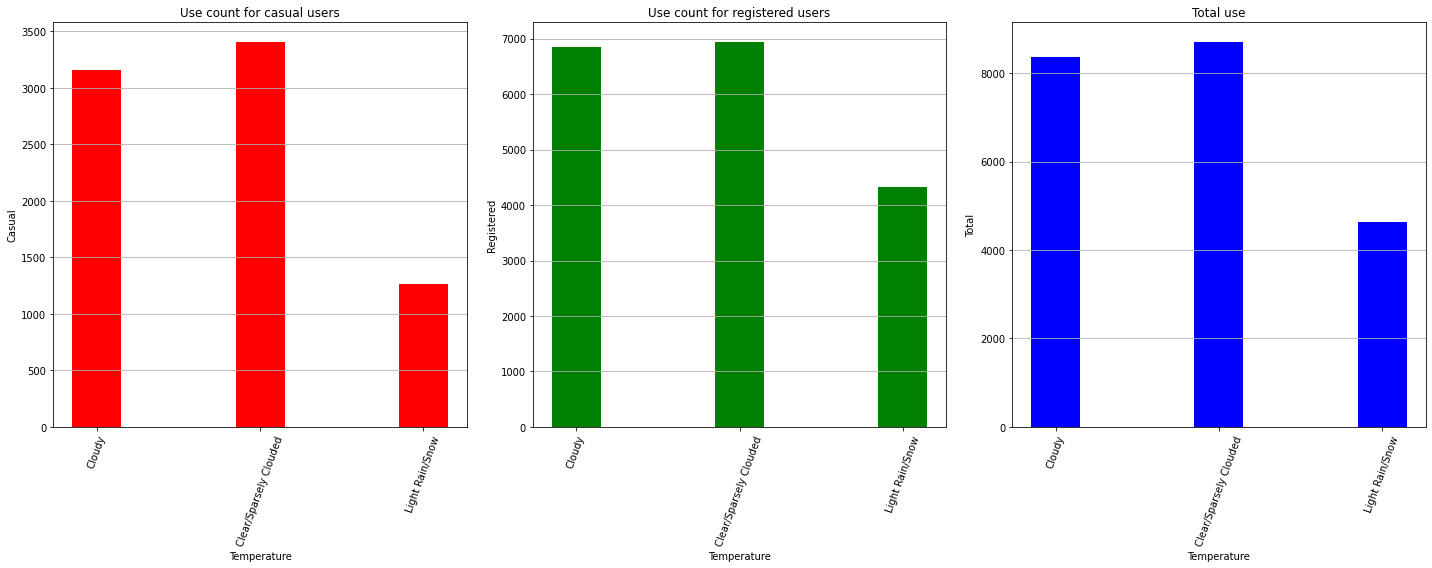

In [ ]:
#plotting bike use in different weather situations as counted for in the day.csv
df_day=pd.read_csv('../datasets/day.csv')
df_day['weathersit']=df_day['weathersit'].apply(lambda x : 'Clear/Sparsely Clouded' if x == 1 else'Cloudy' if x == 2 else'Light Rain/Snow' if x == 3 else 'Heavy Weather')
df_day.rename(columns={'cnt':'total'},inplace=True)

columns = ['casual','registered','total']
colors =['r','g','b']
x=df_day.weathersit.to_numpy()
fig,axes = plt.subplots(ncols=3, figsize=(20,8))
for ind,col in enumerate(columns):
    y=df_day[col].to_numpy()
    axes[ind].bar(x=x,height=y,color=colors[ind], width=0.3, label='label')
    axes[ind].tick_params(axis='x',labelrotation=70)
    axes[ind].set_title(f'Use count for {col} users' if col != 'total' else 'Total use')
    axes[ind].set_xlabel('Temperature')
    axes[ind].set_ylabel(col.capitalize())
    axes[ind].grid(b=True, which='both', axis = 'y')
fig.tight_layout(w_pad=2)
plt.savefig('plots/use-weathersit.png')

In [ ]:
#Integrating the scrapped average aqi dataset (for more info check the readme or the scraper.ipynb file) with the day csv file.
df_pollution = pd.read_csv('../datasets/pollution.csv')
 
df_day_pollution=df_day.merge(df_pollution.drop(['Unnamed: 0','yr','mnth','weekday'],axis=1), on = 'dteday')
df_day_pollution.rename(columns={'cnt':'total'},inplace=True)

df_day_pollution.sort_values(by='aqi_label', inplace = True)
df_day_pollution['aqi_label']=df_day_pollution['aqi_label'].apply(lambda x : 'Good' if x ==1 else 'Moderate' if x ==2 else 'Unhealthy For \n Sensitive Groups' if x ==3 else 'Unhealthy' if x ==4 else 'Very Unhealthy')
df_day_pollution.reset_index(inplace=True,drop=True)
df_day_pollution

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,total,aqi_label,aqi_reading
0,639,2012-09-30,4,1,9,0,0,0,Clear/Sparsely Clouded,0.526667,0.517663,0.583333,0.134958,2015,4874,6889,Good,50
1,619,2012-09-10,3,1,9,0,1,1,Clear/Sparsely Clouded,0.583333,0.565654,0.503750,0.258713,1118,6407,7525,Good,40
2,618,2012-09-09,3,1,9,0,0,0,Clear/Sparsely Clouded,0.610000,0.578925,0.547500,0.224496,2570,5657,8227,Good,39
3,617,2012-09-08,3,1,9,0,6,0,Cloudy,0.659167,0.611121,0.799167,0.281104,1557,4419,5976,Good,47
4,340,2011-12-06,4,0,12,0,2,1,Light Rain/Snow,0.462500,0.456400,0.949583,0.232583,126,2468,2594,Good,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,183,2011-07-02,3,0,7,0,6,0,Clear/Sparsely Clouded,0.738333,0.667308,0.444583,0.115062,2204,2915,5119,Very Unhealthy,202
727,553,2012-07-06,3,1,7,0,5,1,Clear/Sparsely Clouded,0.828333,0.752533,0.450833,0.146142,1366,4841,6207,Very Unhealthy,201
728,546,2012-06-29,3,1,6,0,5,1,Clear/Sparsely Clouded,0.834167,0.786613,0.488750,0.165417,829,4634,5463,Very Unhealthy,212
729,160,2011-06-09,2,0,6,0,4,1,Cloudy,0.808333,0.757579,0.568333,0.149883,563,3352,3915,Very Unhealthy,201


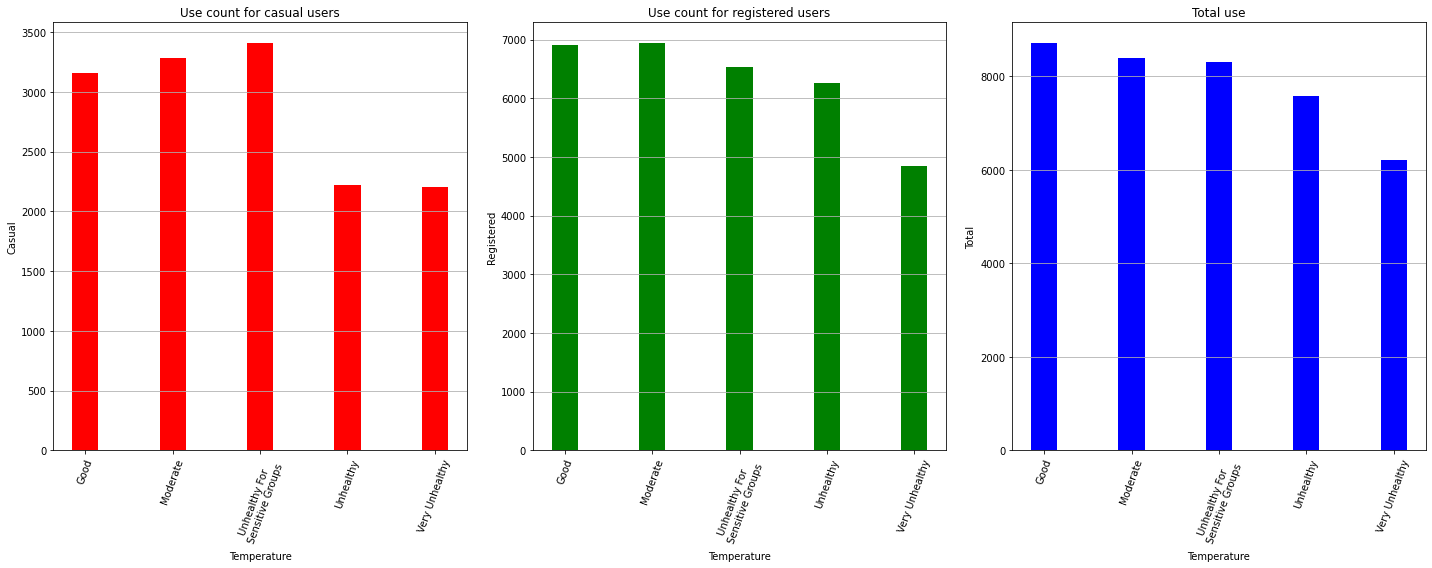

In [ ]:

columns = ['casual','registered','total']
colors =['r','g','b']
x=df_day_pollution.aqi_label.to_numpy()
fig,axes = plt.subplots(ncols=3, figsize=(20,8))
for ind,col in enumerate(columns):
    y=df_day_pollution[col].to_numpy()
    axes[ind].bar(x=x,height=y,color=colors[ind], width=0.3, label='label')
    axes[ind].tick_params(axis='x',labelrotation=70)
    axes[ind].set_title(f'Use count for {col} users' if col != 'total' else 'Total use')
    axes[ind].set_xlabel('Temperature')
    axes[ind].set_ylabel(col.capitalize())
    axes[ind].grid(b=True, which='both', axis = 'y')
    axes[ind].set_xticks(['Good','Moderate','Unhealthy For \n Sensitive Groups','Unhealthy','Very Unhealthy'])
fig.tight_layout(w_pad=2)
plt.savefig('plots/use-pollution.png')